In [20]:
import matplotlib.pyplot as plt
# for reloading of modules
import importlib
from helpers import daspaper

def reload_modules():	
	importlib.reload(daspaper)

reload_modules()
from helpers.daspaper import *

import matplotlib.pyplot as plt

# for reloading of modules
import importlib
from helpers import bohmian_integrator
from helpers import logging, physics_1d_sim_with_damping, plotting_spin, video_spin, data
from helpers import bohmian_plotter

def reload_modules():
	importlib.reload(logging)
	
	importlib.reload(physics_1d_sim_with_damping)
	# importlib.reload(plotting_spin)
	# importlib.reload(video_spin)
	# importlib.reload(data)
	# importlib.reload(bohmian_integrator)
	# importlib.reload(bohmian_plotter)

# Call this whenever you need to reload the modules
reload_modules()

# Then your regular imports
from helpers.logging import *
from helpers.physics_1d_sim_with_damping import *

eta: 2000.0, n: 2


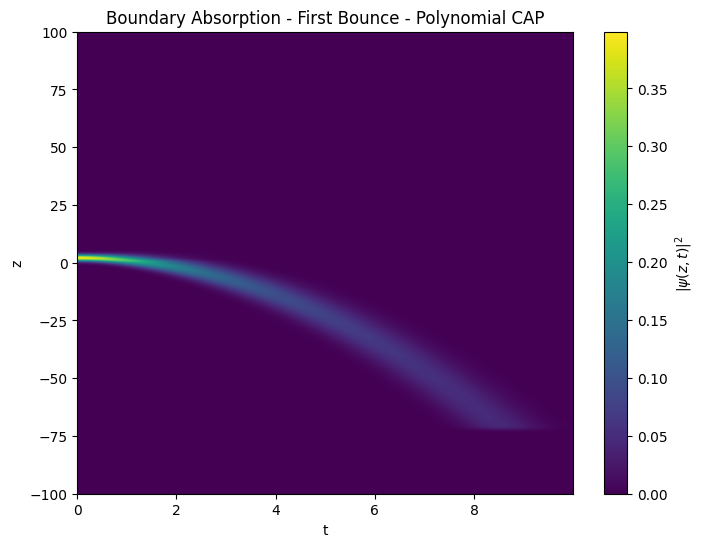

Text(0.5, 1.0, 'Arrival Time Distribution')

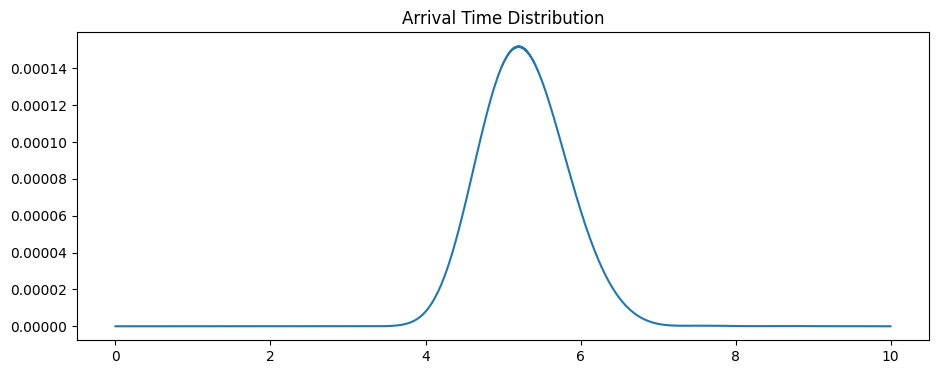

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ------------------
# 1) Constants & Setup
# ------------------
hbar = 1.0
m = 1.0
g = 9.81

# Example usage: delta barrier
barrier_params_delta = {'z0': 0.0, 'alpha': 0.1}
params = {
	"n_steps":10000,
	"dt":0.001,
	"x_min":-100, "x_max":100, "Nx":512*2*2,

	#
	"barrier_type": 'delta',
	"barrier_params": barrier_params_delta,

	# apply_parabolic_dwell=False,
	# strength=100,
	# z_dwell_start=-10,

	# absorbing potential
	"absorber_type": "poly_cap",
	"absorber_params": dict(width=30, n=2, eta=2000.0), # eta = strength, n = polynomial steepness

	# initial wave function
	"sigma0_packet": 1,
	"z0_packet": 2.0,
	"p0_packet": 0.0,

	"m": 1/2,
    "g": 2,
}
z_array, t_vals, prob_arr, loss, psi_history, V_tot  = simulate_n(**params)

# Now plot the spacetime density
plot_spacetime(prob_arr[:][:], z_array, t_vals[:], title="Boundary Absorption - First Bounce - Polynomial CAP", log_scale=True)

J = - (hbar / (m)) * np.imag(
		np.conj(psi_history) * np.gradient(psi_history, axis=0)
	)

dz = z_array[1]-z_array[0]
position = L = -25

JSlice = J[:, int(params["Nx"]/2+position/dz)]
fix, ax = plt.subplots(1,1, figsize=(11,4))
im = ax.plot(t_vals[:], JSlice[:])
ax.set_title("Arrival Time Distribution")

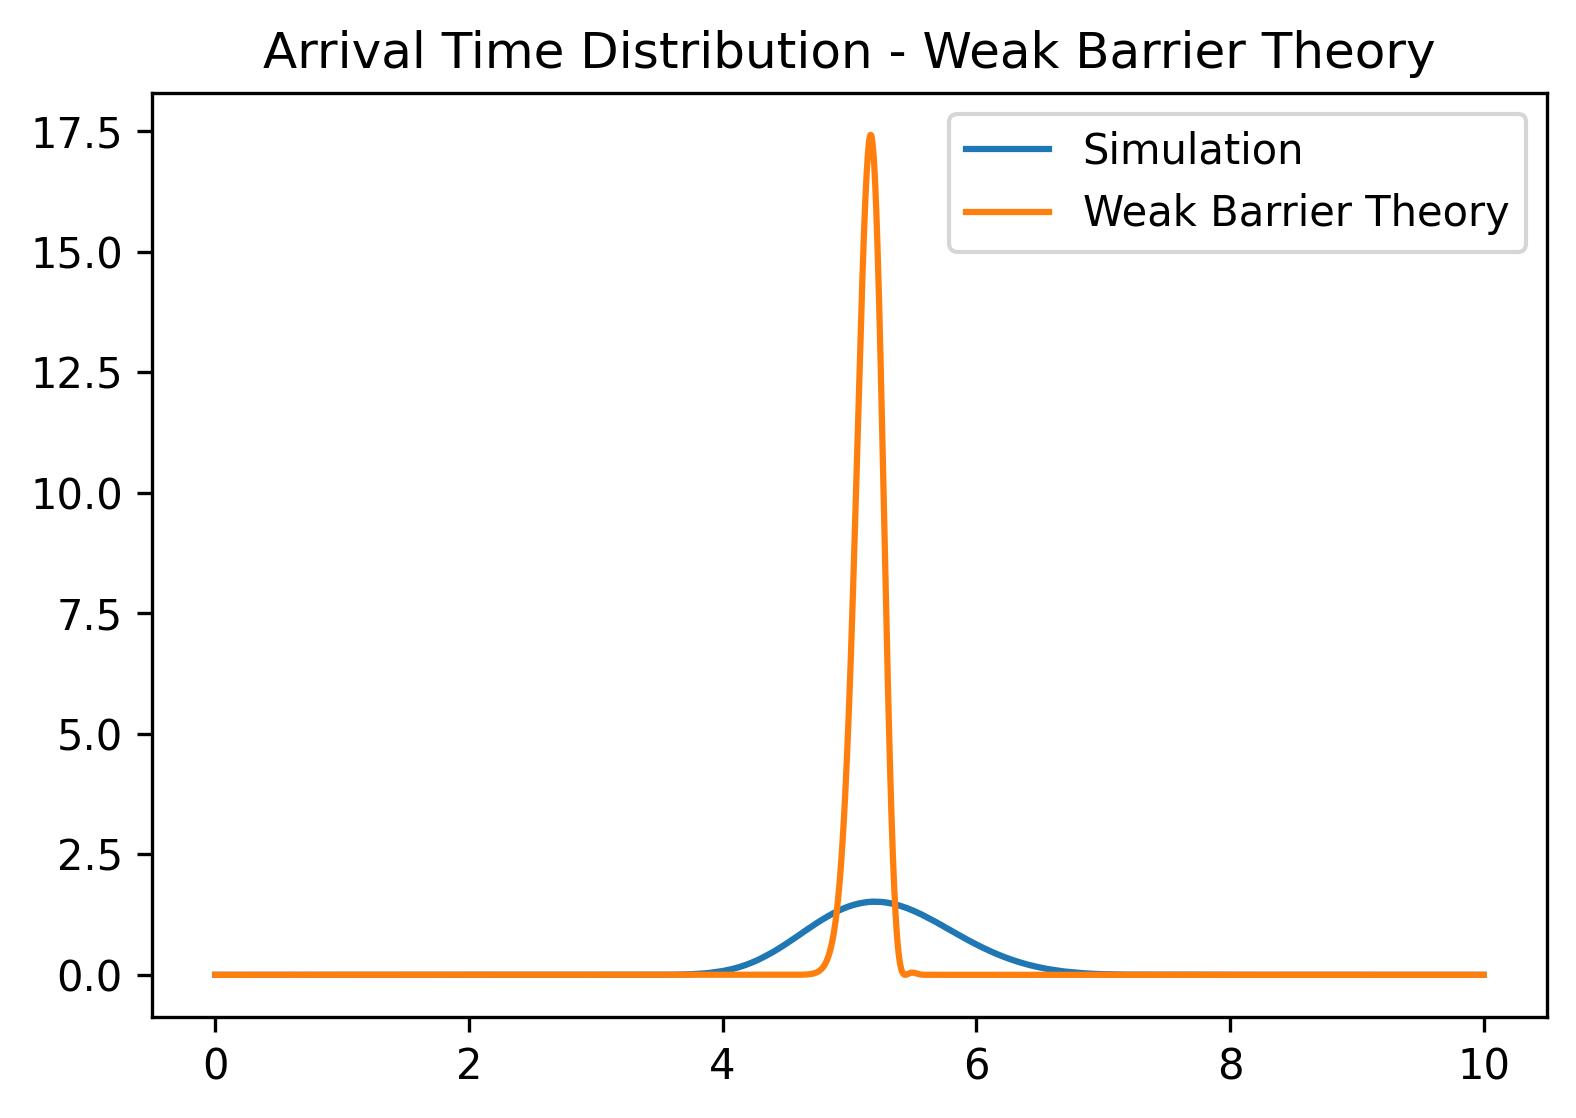

In [26]:
P_vals = [P_gamma_of_tau_2(t, params['sigma0_packet'], params['z0_packet'], -L, barrier_params_delta['alpha']) for t in t_vals]

l_0 = (1/2)**(1/3)

JSlice = J[:, int(params["Nx"]/2+position/dz)]
fix, ax = plt.subplots(1,1, figsize=(6,4))
fix.dpi = 300
im = ax.plot(t_vals[:], JSlice[:]*1e4, label="Simulation")
ax.set_title("Arrival Time Distribution - Weak Barrier Theory")

ax.plot(t_vals[:], P_vals[:], label="Weak Barrier Theory")

ax.legend()

eta: 2000.0, n: 2


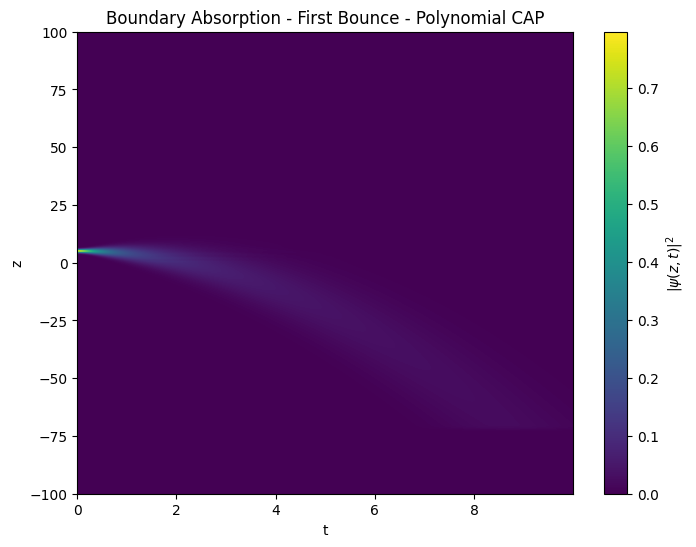

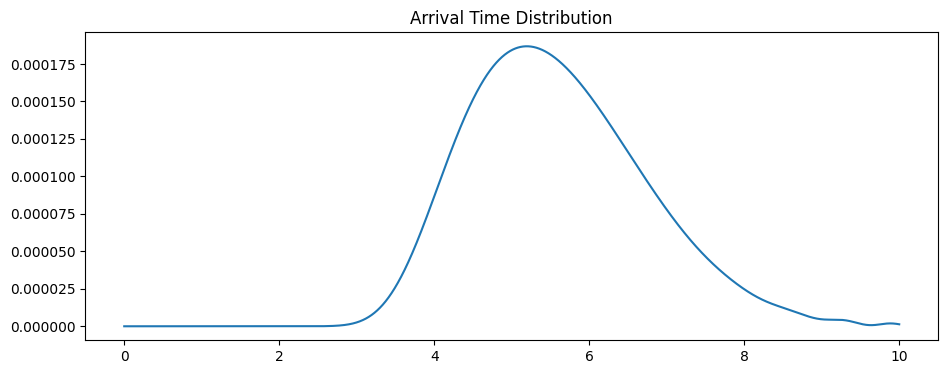

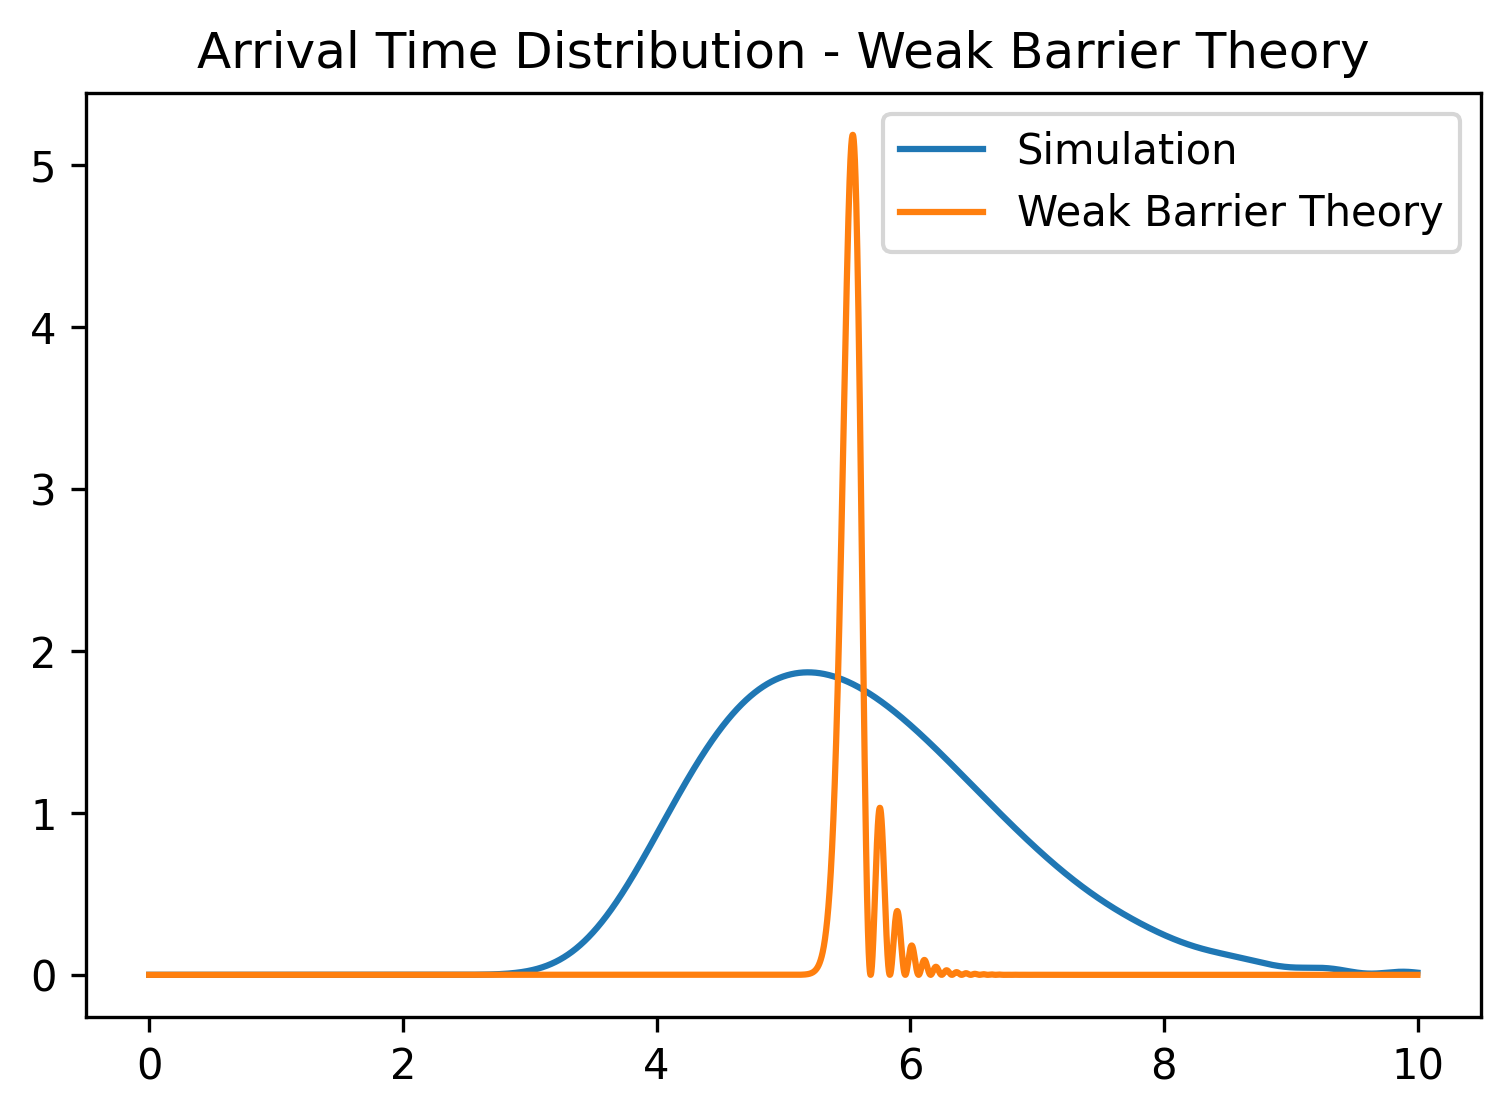

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ------------------
# 1) Constants & Setup
# ------------------
hbar = 1.0
m = 1.0
g = 9.81

# Example usage: delta barrier
barrier_params_delta = {'z0': 0.0, 'alpha': 0.1}
params = {
	"n_steps":10000,
	"dt":0.001,
	"x_min":-100, "x_max":100, "Nx":512*2*2,

	#
	"barrier_type": 'delta',
	"barrier_params": barrier_params_delta,

	# apply_parabolic_dwell=False,
	# strength=100,
	# z_dwell_start=-10,

	# absorbing potential
	"absorber_type": "poly_cap",
	"absorber_params": dict(width=30, n=2, eta=2000.0), # eta = strength, n = polynomial steepness

	# initial wave function
	"sigma0_packet": 0.5,
	"z0_packet": 5.0,
	"p0_packet": 0.0,

	"m": 1/2,
    "g": 2,
}
z_array, t_vals, prob_arr, loss, psi_history, V_tot  = simulate_n(**params)

# Now plot the spacetime density
plot_spacetime(prob_arr[:][:], z_array, t_vals[:], title="Boundary Absorption - First Bounce - Polynomial CAP", log_scale=True)

J = - (hbar / (m)) * np.imag(
		np.conj(psi_history) * np.gradient(psi_history, axis=0)
	)

dz = z_array[1]-z_array[0]
position = L = -25

JSlice = J[:, int(params["Nx"]/2+position/dz)]
fix, ax = plt.subplots(1,1, figsize=(11,4))
im = ax.plot(t_vals[:], JSlice[:])
ax.set_title("Arrival Time Distribution")

# Siddhant Paper
P_vals = [P_gamma_of_tau_2(t, params['sigma0_packet'], params['z0_packet'], -L, barrier_params_delta['alpha']) for t in t_vals]

l_0 = (1/2)**(1/3)

JSlice = J[:, int(params["Nx"]/2+position/dz)]
fix, ax = plt.subplots(1,1, figsize=(6,4))
fix.dpi = 300
im = ax.plot(t_vals[:], JSlice[:]*1e4, label="Simulation")
ax.set_title("Arrival Time Distribution - Weak Barrier Theory")

ax.plot(t_vals[:], P_vals[:], label="Weak Barrier Theory")

ax.legend()

eta: 2000.0, n: 2


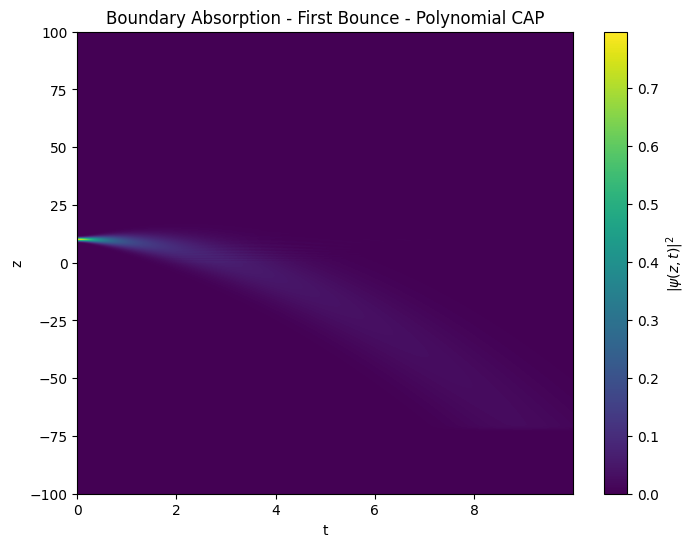

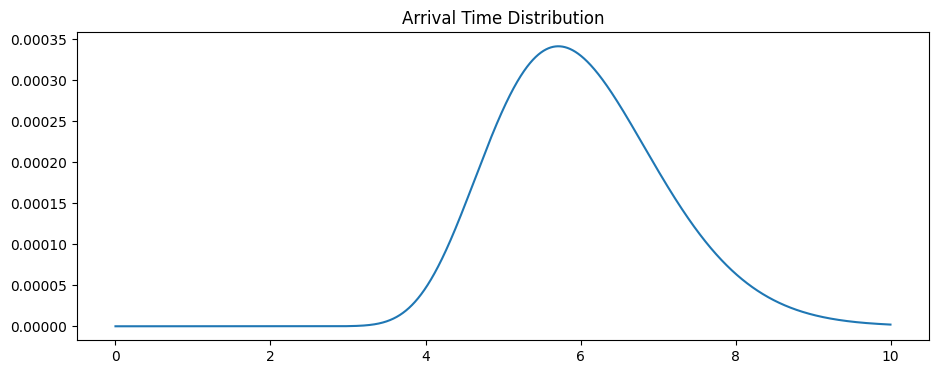

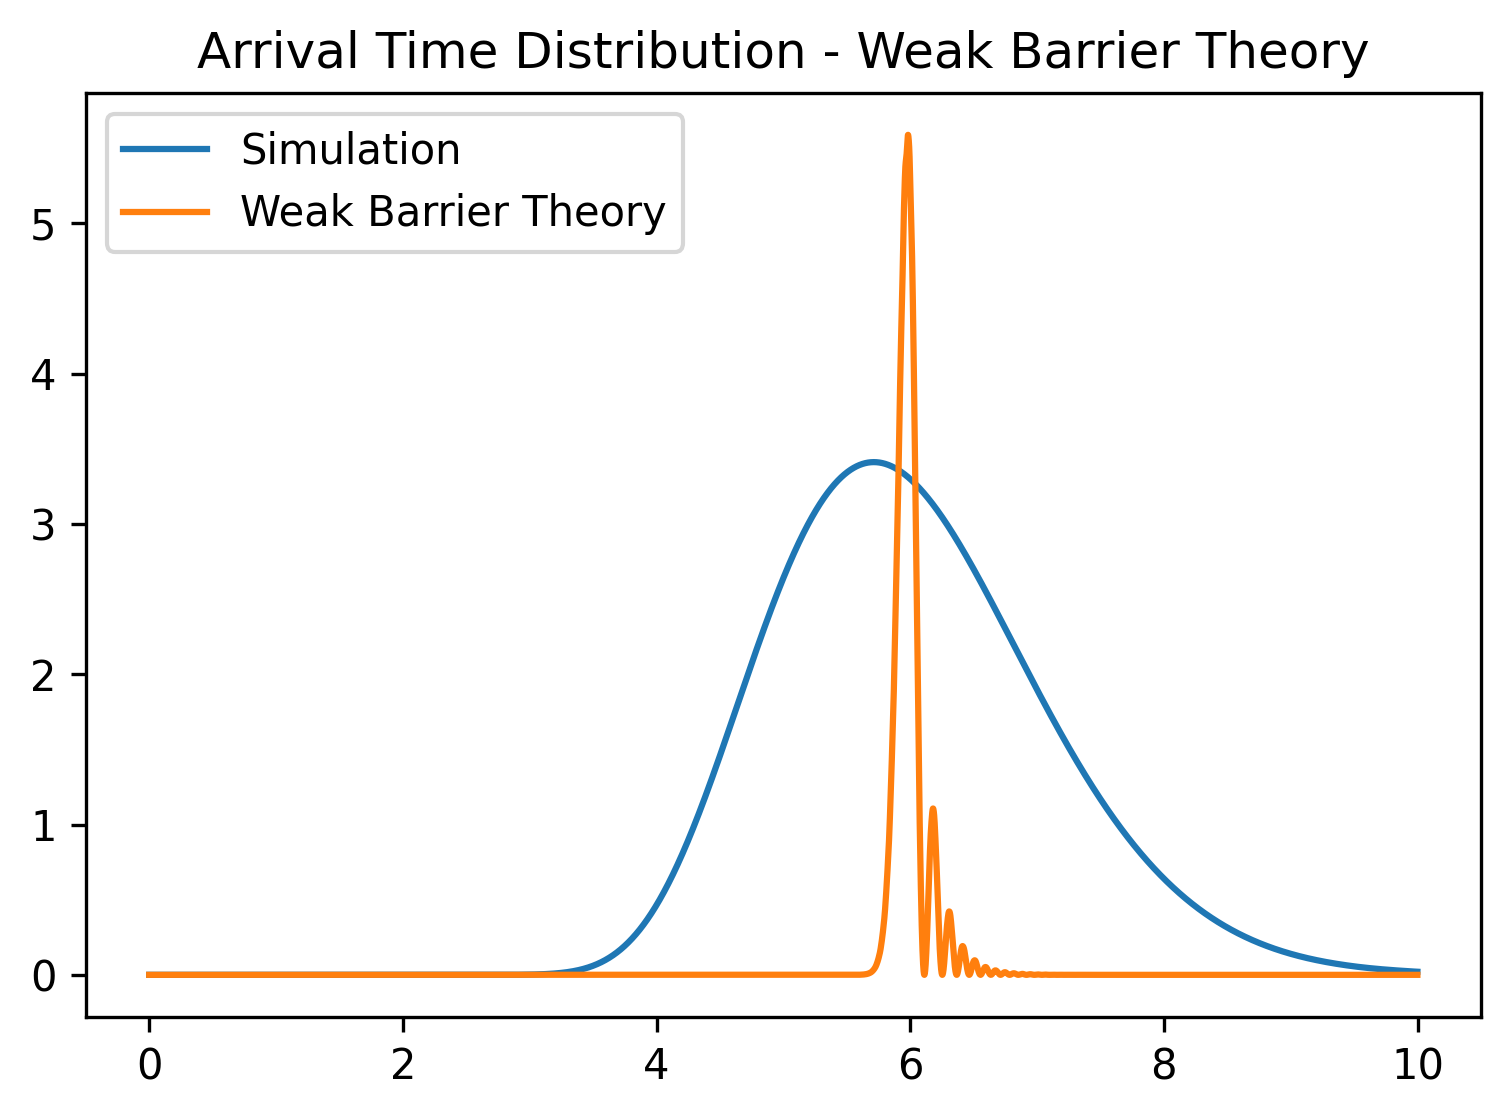

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ------------------
# 1) Constants & Setup
# ------------------
hbar = 1.0
m = 1.0
g = 9.81

# Example usage: delta barrier
barrier_params_delta = {'z0': 0.0, 'alpha': 0.5}
params = {
	"n_steps":10000,
	"dt":0.001,
	"x_min":-100, "x_max":100, "Nx":512*2*2,

	#
	"barrier_type": 'delta',
	"barrier_params": barrier_params_delta,

	# apply_parabolic_dwell=False,
	# strength=100,
	# z_dwell_start=-10,

	# absorbing potential
	"absorber_type": "poly_cap",
	"absorber_params": dict(width=30, n=2, eta=2000.0), # eta = strength, n = polynomial steepness

	# initial wave function
	"sigma0_packet": 0.5,
	"z0_packet": 10.0,
	"p0_packet": 0.0,

	"m": 1/2,
    "g": 2,
}
z_array, t_vals, prob_arr, loss, psi_history, V_tot  = simulate_n(**params)

# Now plot the spacetime density
plot_spacetime(prob_arr[:][:], z_array, t_vals[:], title="Boundary Absorption - First Bounce - Polynomial CAP", log_scale=True)

J = - (hbar / (m)) * np.imag(
		np.conj(psi_history) * np.gradient(psi_history, axis=0)
	)

dz = z_array[1]-z_array[0]
position = L = -25

JSlice = J[:, int(params["Nx"]/2+position/dz)]
fix, ax = plt.subplots(1,1, figsize=(11,4))
im = ax.plot(t_vals[:], JSlice[:])
ax.set_title("Arrival Time Distribution")

# Siddhant Paper
P_vals = [P_gamma_of_tau_2(t, params['sigma0_packet'], params['z0_packet'], -L, barrier_params_delta['alpha']) for t in t_vals]

l_0 = (1/2)**(1/3)

JSlice = J[:, int(params["Nx"]/2+position/dz)]
fix, ax = plt.subplots(1,1, figsize=(6,4))
fix.dpi = 300
im = ax.plot(t_vals[:], JSlice[:]*1e4, label="Simulation")
ax.set_title("Arrival Time Distribution - Weak Barrier Theory")

ax.plot(t_vals[:], P_vals[:], label="Weak Barrier Theory")

ax.legend()

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameter Ranges ---
z0_range = np.arange(2, 12, 2)         # [2, 4, 6, 8, 10]
alpha_range = np.arange(1, 5, 1) # [0.1, 0.6]

# --- Fixed Parameters ---
params_base = {
    "n_steps": 10000,
    "dt": 0.001,
    "x_min": -100, "x_max": 100, "Nx": 512*2*2,
    "barrier_type": 'delta',
    "absorber_type": "poly_cap",
    "absorber_params": dict(width=30, n=2, eta=2000.0),
    "sigma0_packet": 0.5,
    "p0_packet": 0.0,
    "m": 1/2,
    "g": 2,
}
L = -25
hbar = 1.0
m = 1.0

# --- 1. Varying z0, fixed alpha ---
fixed_alpha = alpha_range[0]/10
plt.figure(figsize=(8, 5), dpi=300)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(z0_range):
    params = params_base.copy()
    params["z0_packet"] = z0
    params["barrier_params"] = {'z0': 0.0, 'alpha': fixed_alpha}
    z_array, t_vals, prob_arr, loss, psi_history, V_tot = simulate_n(**params)
    J = - (hbar / (m)) * np.imag(np.conj(psi_history) * np.gradient(psi_history, axis=0))
    dz = z_array[1] - z_array[0]
    JSlice = J[:, int(params["Nx"]/2 + L/dz)]
    # Simulation
    plt.plot(t_vals, JSlice*1e4, color=colors[i % len(colors)], label=f"Sim z0={z0}")
    # Weak theory
    P_vals = [P_gamma_of_tau_2(t, params['sigma0_packet'], z0, -L, fixed_alpha) for t in t_vals]
    plt.plot(t_vals, P_vals, '--', color=colors[i % len(colors)], label=f"WeakTh z0={z0}")

plt.title("Arrival Time Distribution - Varying $z_0$ (alpha=%.2f)" % fixed_alpha)
plt.xlabel("Time")
plt.ylabel("Current / Theory")
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("varying_z0.png", dpi=300)
plt.close()

# --- 2. Varying alpha, fixed z0 ---
fixed_z0 = z0_range[2]  # e.g., z0=6
plt.figure(figsize=(8, 5), dpi=300)

for i, alpha in enumerate(alpha_range):

    alpha = alpha/10
    params = params_base.copy()
    params["z0_packet"] = fixed_z0
    params["barrier_params"] = {'z0': 0.0, 'alpha': alpha}
    z_array, t_vals, prob_arr, loss, psi_history, V_tot = simulate_n(**params)
    J = - (hbar / (m)) * np.imag(np.conj(psi_history) * np.gradient(psi_history, axis=0))
    dz = z_array[1] - z_array[0]
    JSlice = J[:, int(params["Nx"]/2 + L/dz)]
    # Simulation
    plt.plot(t_vals, JSlice*1e4, color=colors[i % len(colors)], label=f"Sim alpha={alpha:.2f}")
    # Weak theory
    P_vals = [P_gamma_of_tau_2(t, params['sigma0_packet'], fixed_z0, -L, alpha) for t in t_vals]
    plt.plot(t_vals, P_vals, '--', color=colors[i % len(colors)], label=f"WeakTh alpha={alpha:.2f}")

plt.title("Arrival Time Distribution - Varying $\\alpha$ (z0=%d)" % fixed_z0)
plt.xlabel("Time")
plt.ylabel("Current / Theory")
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("varying_alpha.png", dpi=300)
plt.close()

eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
eta: 2000.0, n: 2
